**训练时：** 先从前往后算一遍，得到一个句子，从最后一个字从后往前推一遍，最后两个结果加在一起

（倒背如流）

**！！！双向网络主要用于对句子进行特征提取，而不是用于预测下一个字是什么**

![2025-07-14 20-13-27 的屏幕截图.png](<attachment:2025-07-14 20-13-27 的屏幕截图.png>)
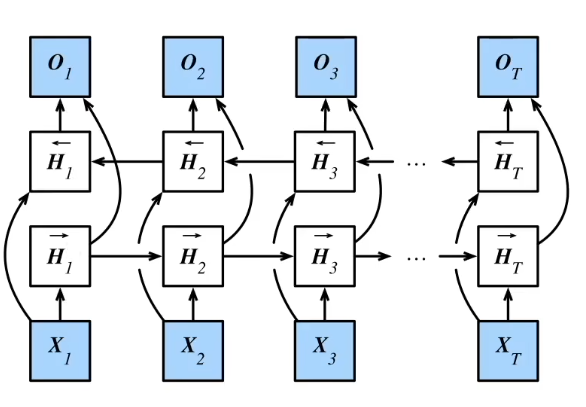

前向RNN公式：
$$\overrightarrow{H}_t = \tanh(W{xh}^{(f)} x_t + W_{hh}^{(f)} \overrightarrow{H}_{t-1} + b_h^{(f)})$$

后向RNN公式：
$$\overleftarrow{H}_t = \tanh(W{xh}^{(b)} x_t + W_{hh}^{(b)} \overleftarrow{H}_{t+1} + b_h^{(b)})$$

最终输出：
$$H_t = [\overrightarrow{H}_t, \overleftarrow{H}_t]$$

其中：

$\overrightarrow{H}_t$：前向隐藏状态

$\overleftarrow{H}_t$：后向隐藏状态

$[,]$：向量拼接操作

$W^{(f)}, W^{(b)}$：前向和后向的权重矩阵（独立）

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [5]:
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size
device  = d2l.try_gpu()
# num_layers 即隐藏层数量
lstm_layer = nn.LSTM(
    num_inputs, num_hiddens, num_layers, bidirectional=True)
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)

困惑度1.1, 155065.8 词元/秒 cuda:0
time travellerererererererererererererererererererererererererer
travellerererererererererererererererererererererererererer


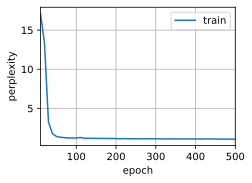

In [6]:
num_epochs, lr = 500, 2
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)